# 군집 알고리즘

비지도학습이란 지도학습과 다르게 모델에 학습하는 데이터에 타겟값이 주어지지 않은 학습방법을 통칭한다.


## 과일 사진 데이터 준비하기

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits = np.load('fruits_300.npy')

In [5]:
# 샘플수 300개, 이미지의 높이 100, 이미지의 너비 100

print(fruits.shape)

(300, 100, 100)


In [6]:
# 데이터의 첫번째 행의 데이터 선택하여 확인하기
# 픽셀 100개에 들어간 값을 출력
# 흑백사진 0 ~ 255까지의 정숫값 有
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


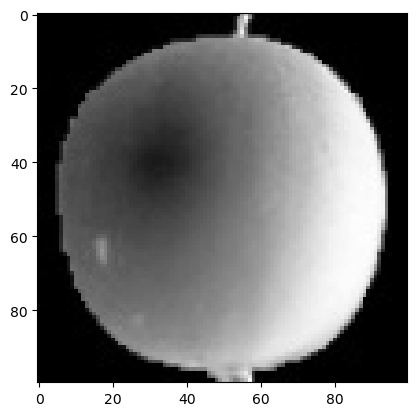

In [7]:
# plt를 사용하여 넘파이 배열에 저장된 이미지를 그릴 수 있다.
# 흑백 사진이므로 cmap ='gray ' 사용

plt.imshow(fruits[0], cmap='gray')
plt.show()

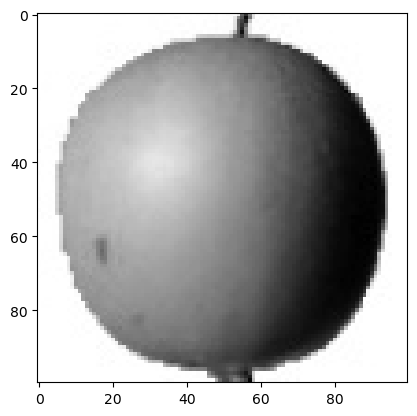

In [8]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

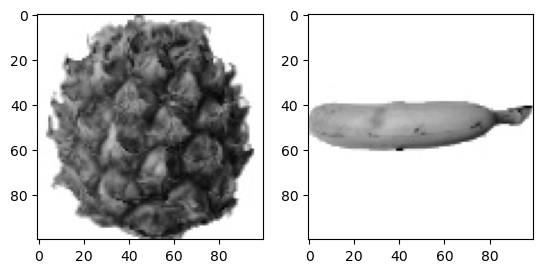

In [9]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

# 픽셀 값 분석하기

각 과일 이미지의 픽셀값의 평균을 기준으로 어떤 과일 샘플이 어떤 과일에 속하는지 예측해야하므로
2차원 이미지 배열을 1차원으로 만들어 평균값을 구하기 용이하도록 reshape한다

In [14]:
# 해당 데이터 파일은 100개를 기준으로 과일 이미지를 가지고 있기 때문에 다음과같이 슬라이싱 가능


apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [16]:
print("2차원 이미지 배열이 1차원으로 배열로 reshape")
print(apple.shape)

2차원 이미지 배열이 1차원으로 배열로 reshape
(100, 10000)


In [17]:
# 각 이미지의 픽셀값 평균 구하기
# 동일 행은 동일 이미지의 픽셀값으로 axis = 1 로 설정하여 동일행 데이터의 평균 구하기

print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


## 히스토그램을 통해 픽셀값 평균 시각화

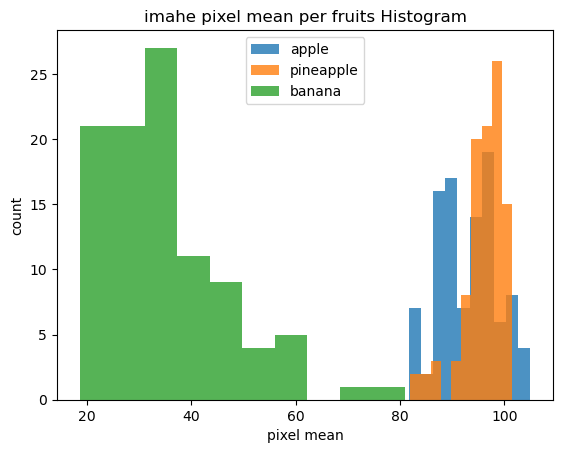

In [22]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.title("imahe pixel mean per fruits Histogram")
plt.xlabel("pixel mean")
plt.ylabel("count")

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

## 각 과일 이미지의 평균값의 특징

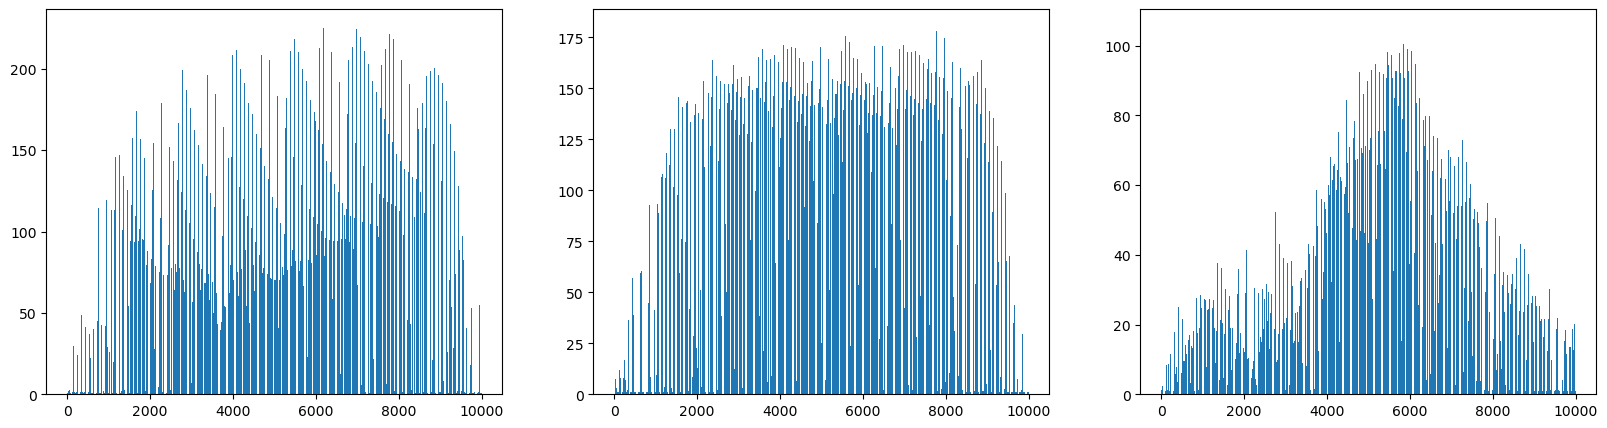

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

순서대로 사과, 파인애플, 바나나 이미지 픽셀 위치에 따른 픽셀값의 특징을 시각화한 것이다. 파인애프릉ㄴ 비교적 고르게 높고 바나나의 경우 중앙 픽셀값이 높은 것을 확인할 수 있다.

## 픽셀 평균값을 100*100 크기로 바꿔 이미지 출력

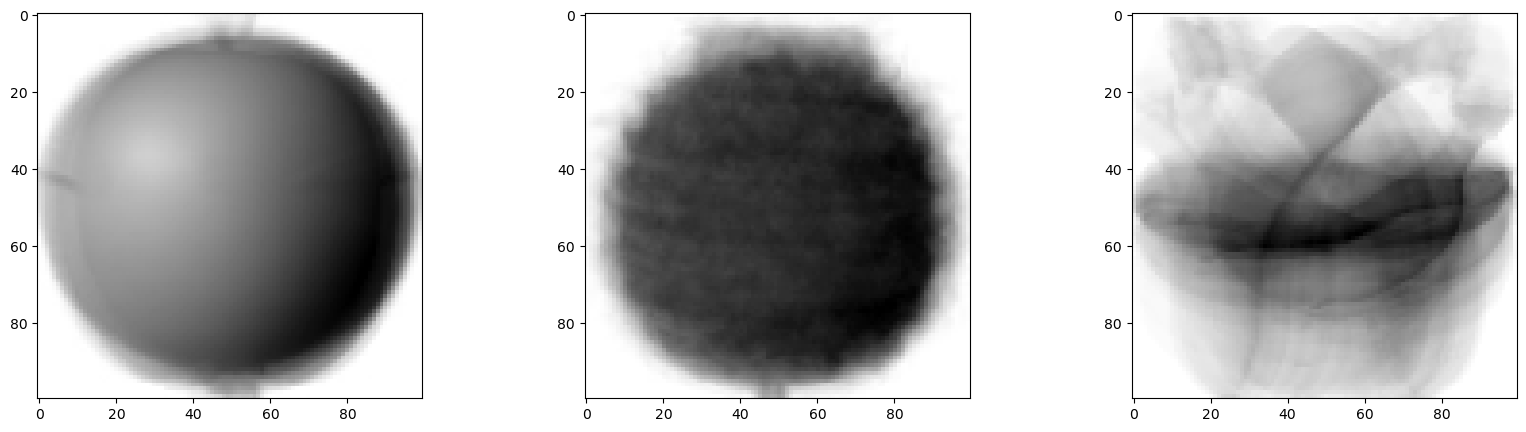

In [25]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기



In [27]:
# 절댓값 오차를 사용하여 픽셀평균과 각 샘플의 픽셀값을 비교

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


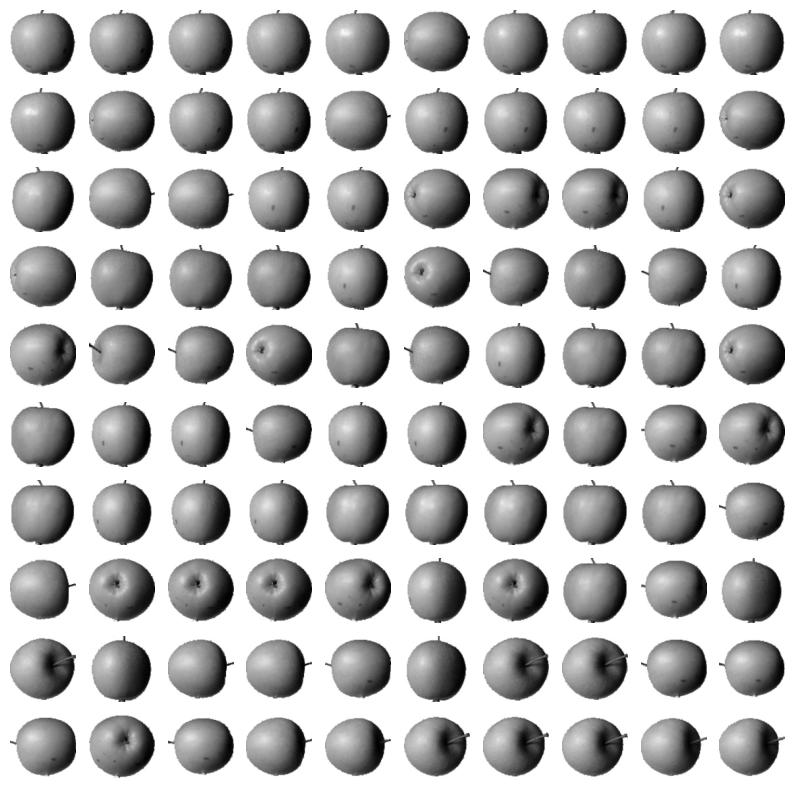

In [28]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

APPLE mean 과 가까운 사진 100개를 골랐더니 모두 사과였다.  

이렇게 비슷한 샘플끼리 그룹으로 모으는 작업 `군집`
* 클러스터: 군집에서 만든 그룹

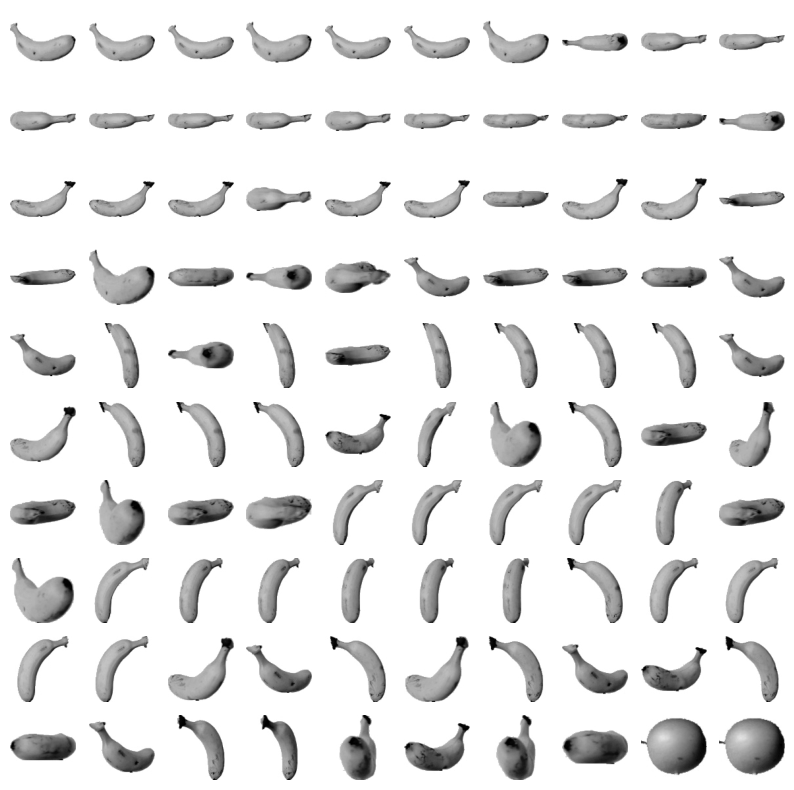

In [29]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

미리 평균값을 구할 수 없을때 

## K-평균 군집 알고리즘

평균값을 자동으로 계산해 그것을 기준으로 샘플을 군집화. 해당 평균값이 클러스터의 중심에 위치하기 때문에 `클러스터 중심` 또는 `센트로이드` 라고 부른다

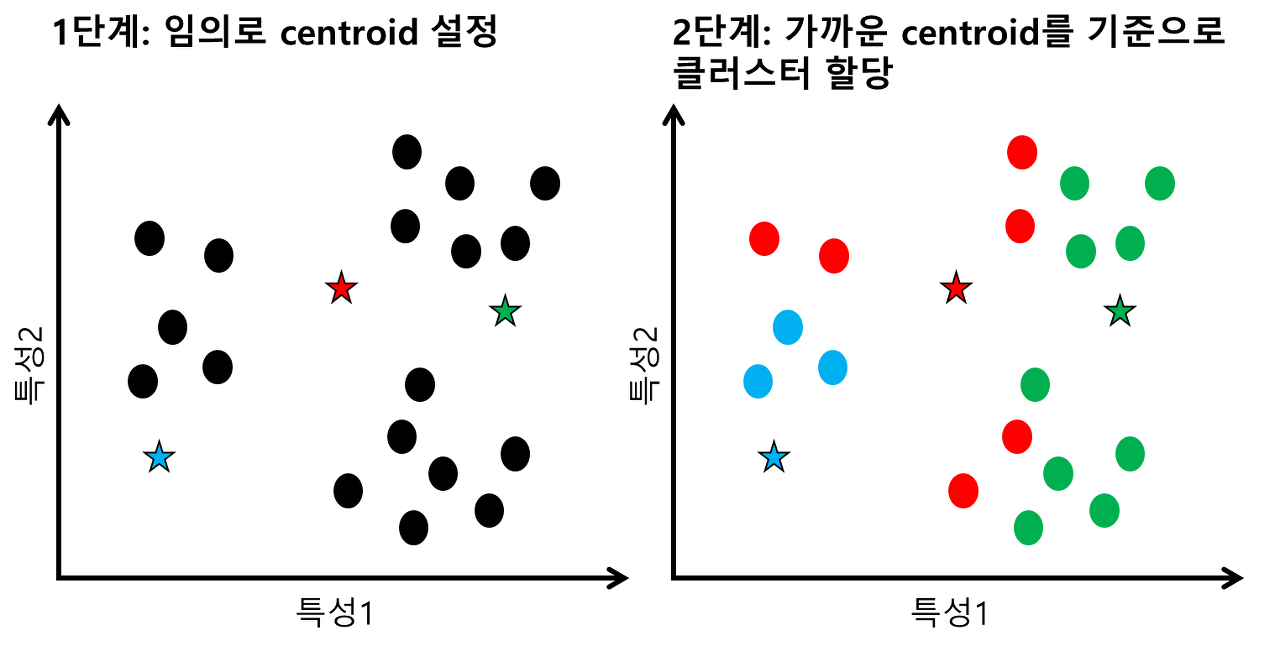

클러스터의 속한 샘플의 평균값으로 클러스터 중심 변경

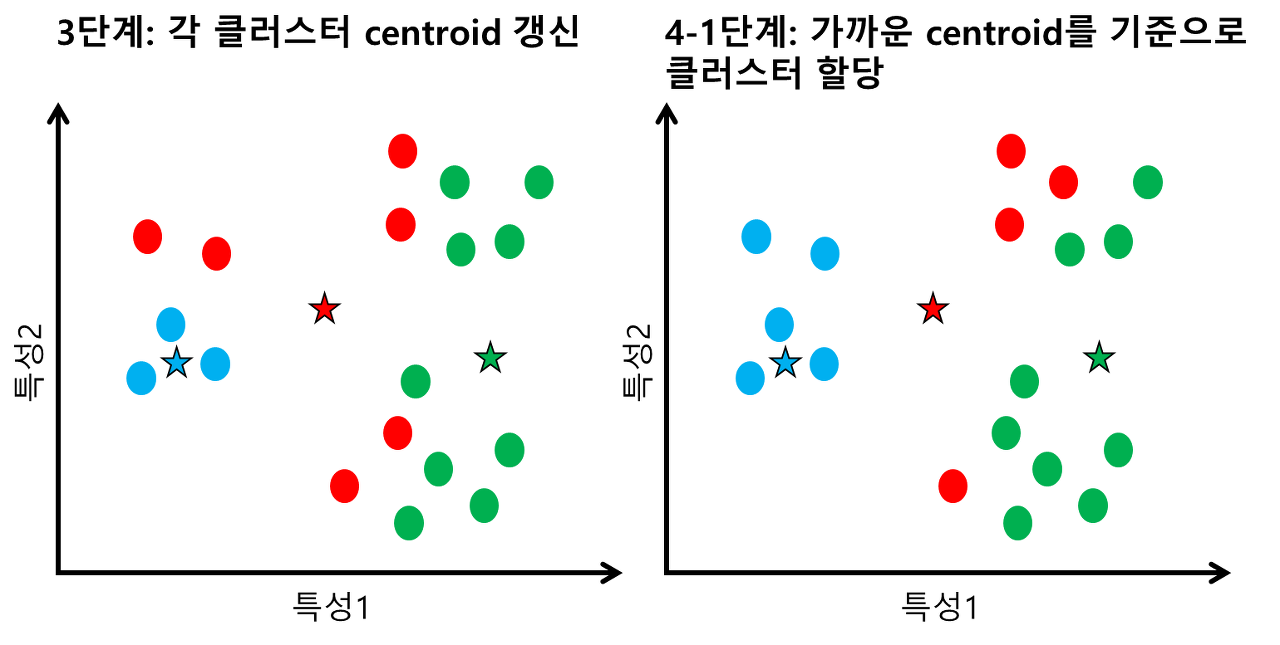

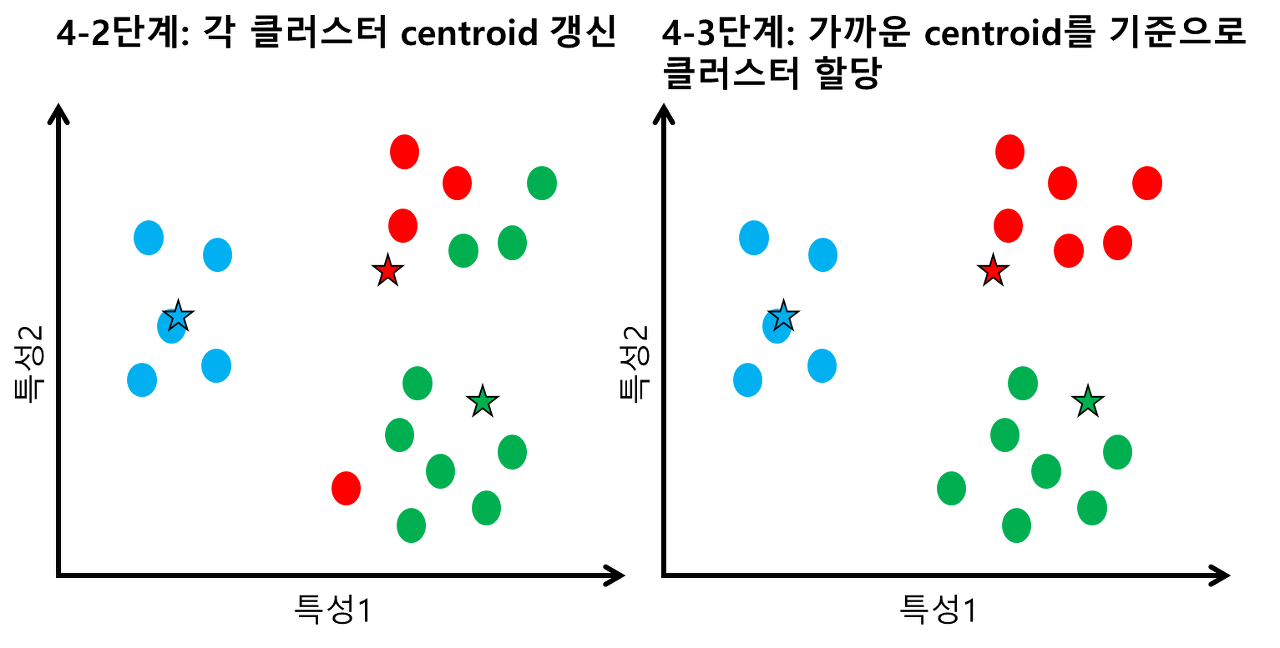

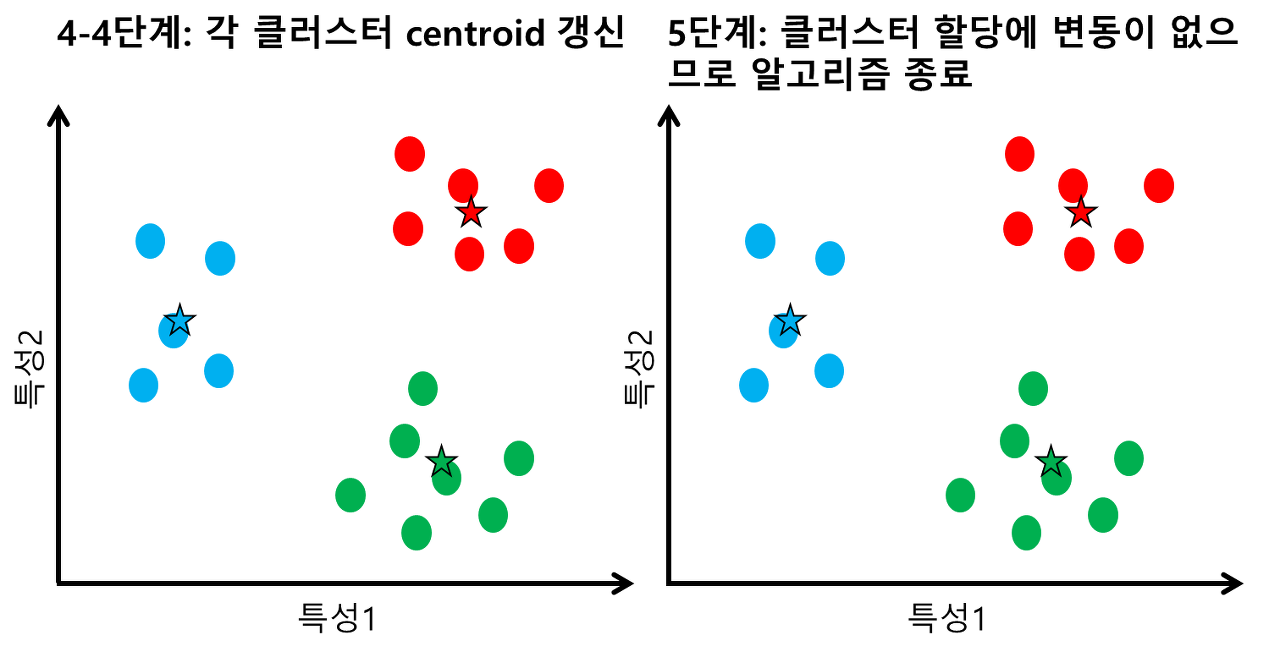

In [30]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42) # 클러스터 3개로 
km.fit(fruits_2d)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [32]:
# 클러스터가 3이므로 라벨은 0,1,2로 구성. 숫자에 의미 없음.

print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [33]:
# 각 라벨별 데이터 개수
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [34]:
import matplotlib.pyplot as plt


# 각 라벨로 클러스터로 묶인 데이터의 이미지를 그리는 함수

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

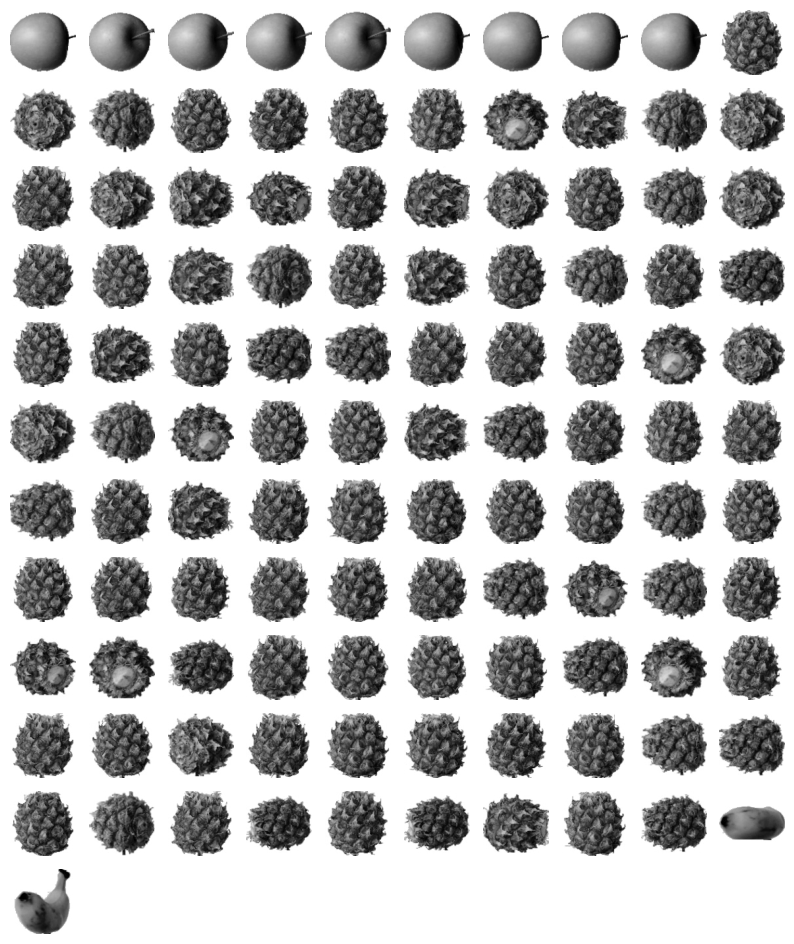

In [35]:
# 라벨 0의 클러스터로 묶인 이미지출력

draw_fruits(fruits[km.labels_==0])

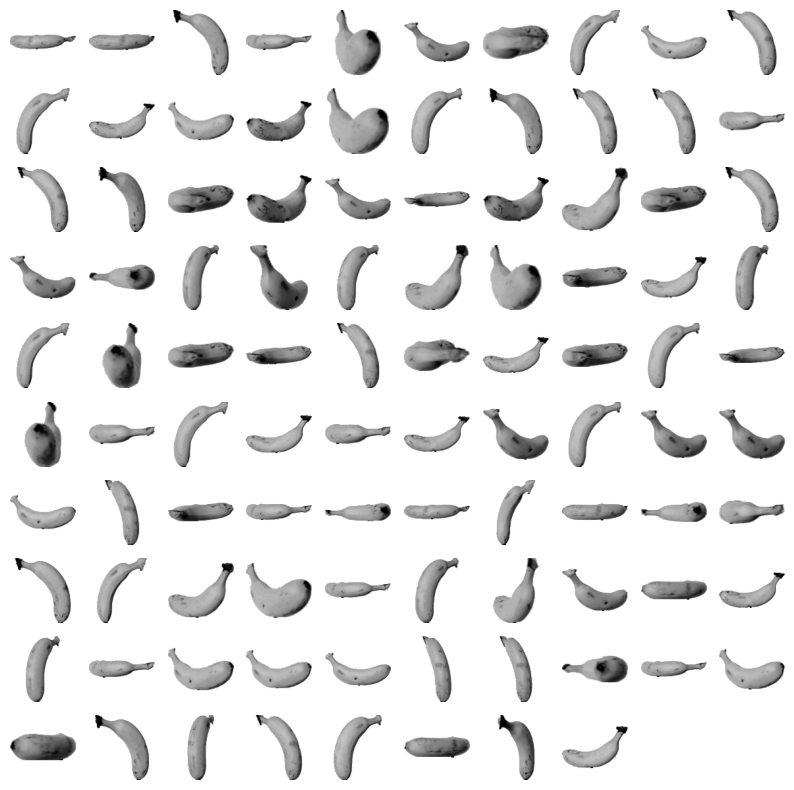

In [36]:
draw_fruits(fruits[km.labels_==1])

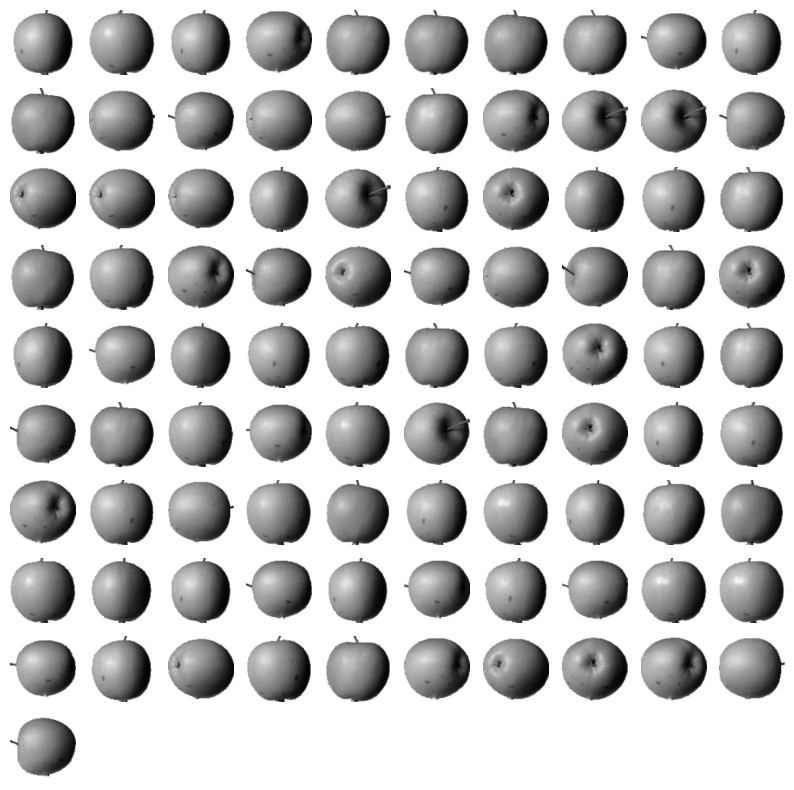

In [37]:
draw_fruits(fruits[km.labels_==2])

# 클러스터 중심

Kmeans 클래스가 최종적으로 찾은 클러스터의 중심(centroid)는 `cluster_centers_` 속성에 저장되어있다.

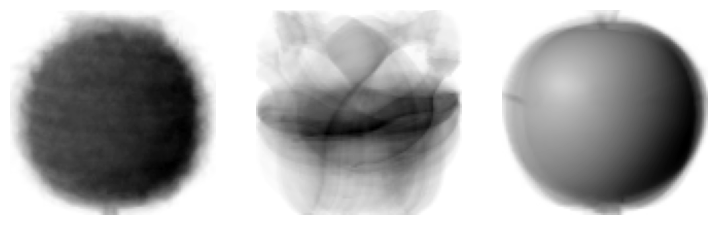

In [38]:
# 클러스터 중심값을 이미지화 한것

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [40]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


0,1,2 클러스터에 대한 어떤 샘플의 거리를 나타내는 코드이다. 첫번째 클러스터인 0과 가장 가까운 값을 출력하느로 해당 샘플이 0으로 예측됐을 것을 확인할 수 있다.

In [41]:
print(km.predict(fruits_2d[100:101]))

[0]


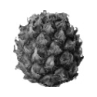

In [42]:
draw_fruits(fruits[100:101])

In [43]:
# 클러스터 중심을 옮기며 알고리즘을 반복한 횟수

print(km.n_iter_)

4


# 최적의 k찾기

분류해야할 클러스터의 개수를 사전에 알 수 없는 경우가 많음. 

### 엘보우 

클러스터 중심과 각 샘플의 거리를 구할 수 있다. 이때 이 거리의 제곱합을 `이너셔`라고 한다. 이너셔는 클러스터에 있는 샘플값이 서로 얼마나 가까이 있는지 나타내는 지표가될 수 있다. 일반적으로 클러스터의 개수가 늘어나면 클러스터 개개의 크기가 줄어들어 이너셔의 값도 작아진다. 

엘보우 방법은 이너셔를 늘려가며 그 변화를 관찰하며 최적의 클러스터 개수를 찾는 방법이다.

이너셔를 늘리다보면 클러스터개수가 감소하는 속도가 꺾이는 지점이 있음. 그 지점 이후로 클러스터의 개수를 늘려도 클러스터에 밀집 정도가 크게 개선되지 않는다고 판단하여 해당 지점을 최적 k값으로 선정한다.

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

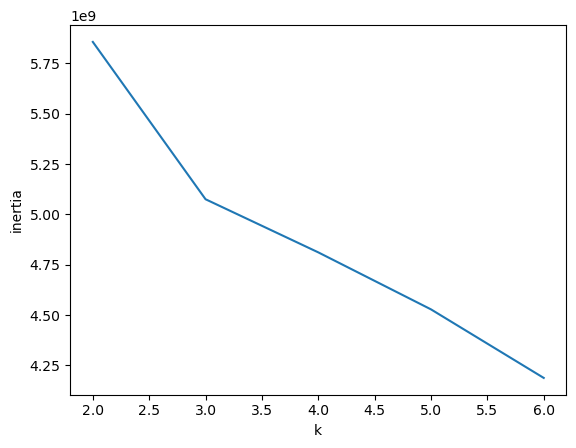

In [44]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)

plt.xlabel('k')
plt.ylabel('inertia')

plt.show()